# Example

This notebook shows the output of functions defined in `utils/`.

This notebook can be run in a Python virtual environment. To create such an environment, run
```bash
bash$ cd path/to/contianing/folder
bash$ python3.11 -m venv ./venv
```

To enable the environment,
```bash
bash$ source venv/bin/activate
```

Next, install the required dependencies:
```bash
bash$ python -m pip install -r ./requirements.txt
```

Finally, this notebook can be opened and run in JupyterLab or Visual Studio Code.

# `utils/segment_image`

/home/self/Documents/page-segment/pipeline/venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


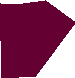

In [1]:
from utils.segment_image import crop_image_to_polygon, segment_image
from PIL import Image

# Visual test: Cropping an image to a polygon
test_image = Image.new('RGB', (100, 100), color=(100, 0, 50))
crop_image_to_polygon(test_image, [(15, 15), (30, 16), (60, 12), (90, 34), (50, 88), (16, 90)])

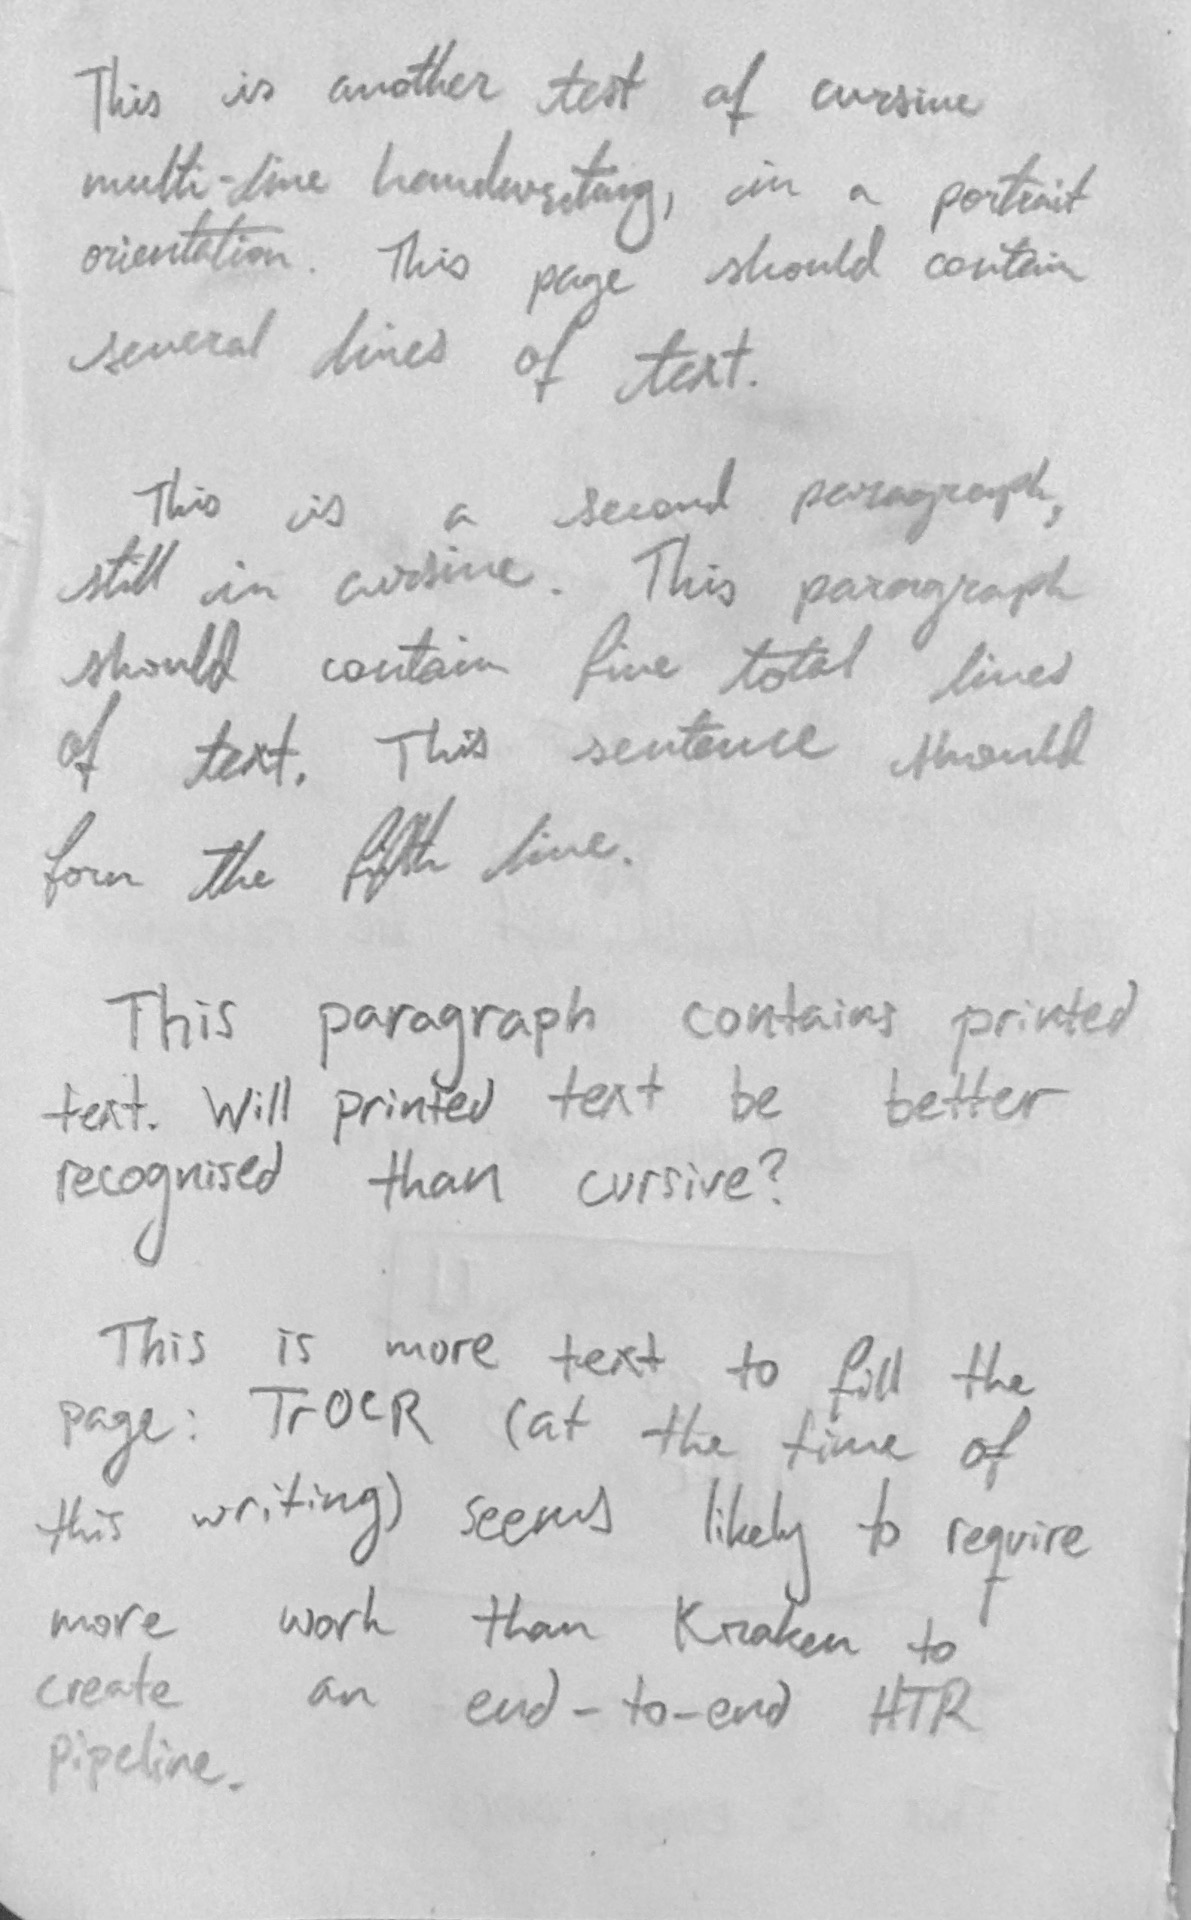

In [2]:
test_image = Image.open('../custom-samples/multi-line/text-lines-8.jpeg')
test_image = test_image.convert('L').convert('RGB') # Convert to grayscale
test_image

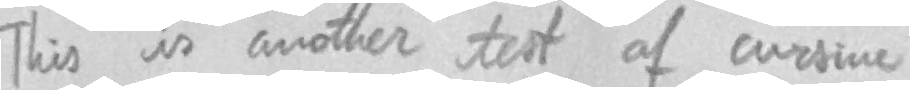

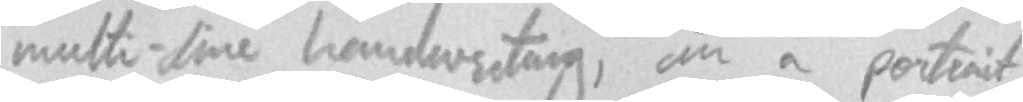

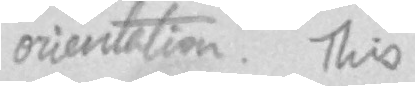

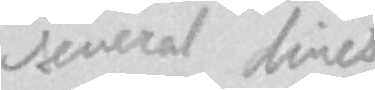

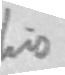

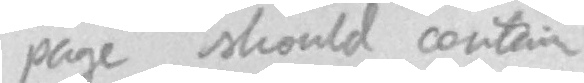

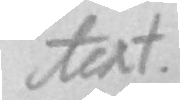

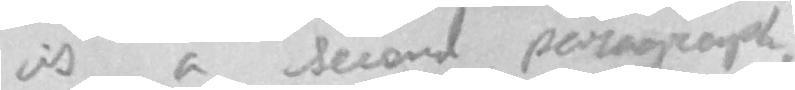

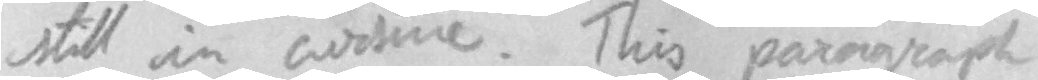

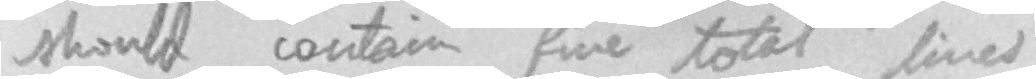

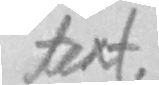

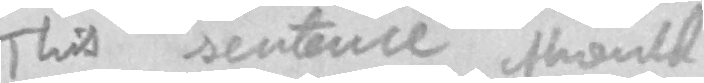

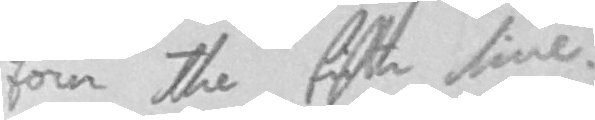

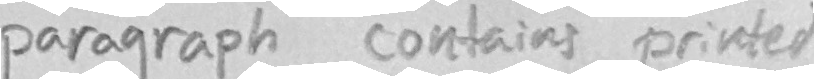

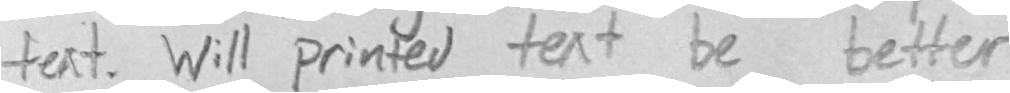

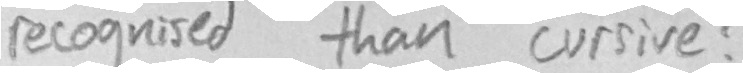

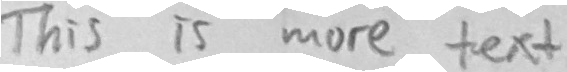

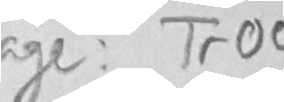

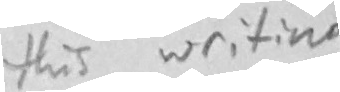

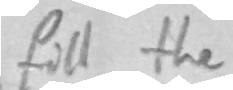

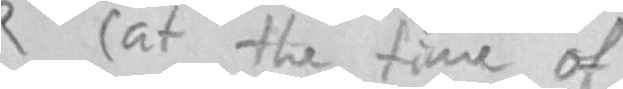

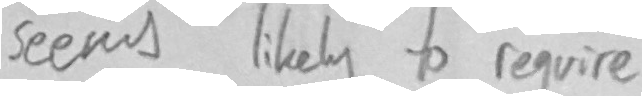

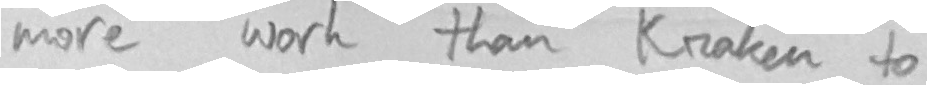

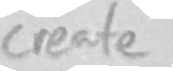

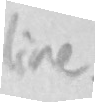

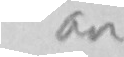

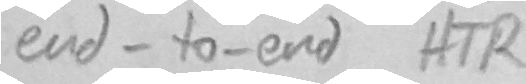

In [ ]:
# For now, this uses the built-in Kraken page segmenter, which seems to only
# work well for mostly-full pages (as above).
for line in segment_image(test_image):
	# Decrease the size of each image (makes embedding in this notebook
	# work better)
	line = line.copy()
	line.thumbnail((200, 40))

	display(line)

# `utils/TextRecogniser`

`utils.TextRecognizer` can be used to convert a full page of handwriting to text:

In [4]:
from utils.TextRecognizer import TextRecognizer

# TODO: Currently, this uses the upstream HTR (English-only) model.
#       This should be changed to use the French model.
recognizer = TextRecognizer()

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

In [5]:
recognizer.recognize_page(test_image)

['This is another test of cursive',
 'multicoline broadcasting , can a patient',
 'orientation . This',
 'several denies',
 'kio',
 'page should contain',
 'tent .',
 'is a second paragraph .',
 'still in another . This paragraph',
 'should contain fine tales . lines',
 'tent .',
 'This sentence should',
 'form the fifth lines .',
 'paragraph contains printed',
 'tent . Will printed text be better',
 'recognised than cursives .',
 'This is more text',
 'age , true',
 'this wartime .',
 '7',
 'full the',
 '" Cat the time of',
 'seems likely to require',
 'more work than Kroaken to',
 'create',
 'line .',
 'can',
 'end-to-end ATR']